In [41]:
!pip install matplotlib

In [42]:
!pip install seaborn scikit-learn

In [43]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.stats import zscore


In [44]:
# Load dataset
data = pd.read_csv("iris_clustering.csv")

# Basic inspection
print("Dataset Info:")
print(data.info())

print("\nFirst 5 rows:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [45]:
# Separate target and features
target = data['species']
features = data.drop(columns=['species'])



Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


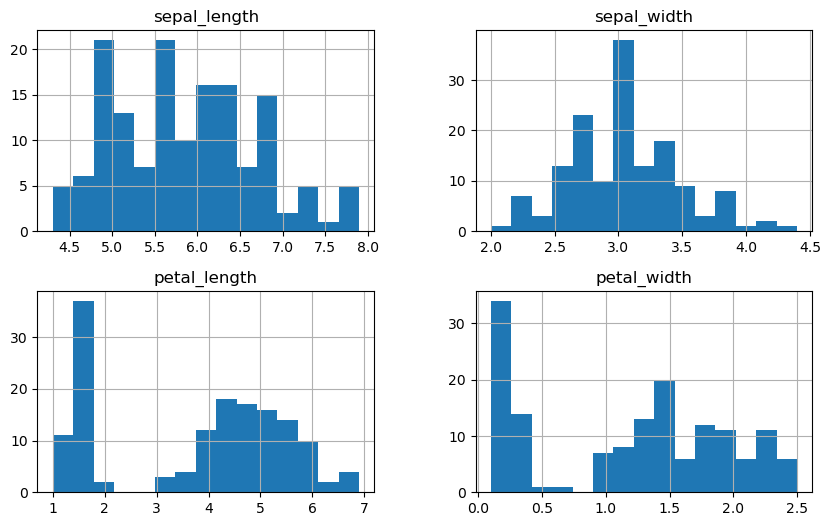

In [46]:
# Check missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Histograms
features.hist(figsize=(10, 6), bins=15)
plt.show()


In [47]:
zscore?

Signature: zscore(a, axis=0, ddof=0, nan_policy='propagate')
Docstring:
Compute the z score.

Compute the z score of each value in the sample, relative to the
sample mean and standard deviation.

Parameters
----------
a : array_like
    An array like object containing the sample data.
axis : int or None, optional
    Axis along which to operate. Default is 0. If None, compute over
    the whole array `a`.
ddof : int, optional
    Degrees of freedom correction in the calculation of the
    standard deviation. Default is 0.
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan. 'propagate' returns nan,
    'raise' throws an error, 'omit' performs the calculations ignoring nan
    values. Default is 'propagate'.  Note that when the value is 'omit',
    nans in the input also propagate to the output, but they do not affect
    the z-scores computed for the non-nan values.

Returns
-------
zscore : array_like
    The z-scores, standardized b

In [48]:
# Calculate Z Score 
z_scores = np.abs(zscore(features))

z_scores

array([[9.00681170e-01, 1.03205722e+00, 1.34127240e+00, 1.31297673e+00],
       [1.14301691e+00, 1.24957601e-01, 1.34127240e+00, 1.31297673e+00],
       [1.38535265e+00, 3.37848329e-01, 1.39813811e+00, 1.31297673e+00],
       [1.50652052e+00, 1.06445364e-01, 1.28440670e+00, 1.31297673e+00],
       [1.02184904e+00, 1.26346019e+00, 1.34127240e+00, 1.31297673e+00],
       [5.37177559e-01, 1.95766909e+00, 1.17067529e+00, 1.05003079e+00],
       [1.50652052e+00, 8.00654259e-01, 1.34127240e+00, 1.18150376e+00],
       [1.02184904e+00, 8.00654259e-01, 1.28440670e+00, 1.31297673e+00],
       [1.74885626e+00, 3.56360566e-01, 1.34127240e+00, 1.31297673e+00],
       [1.14301691e+00, 1.06445364e-01, 1.28440670e+00, 1.44444970e+00],
       [5.37177559e-01, 1.49486315e+00, 1.28440670e+00, 1.31297673e+00],
       [1.26418478e+00, 8.00654259e-01, 1.22754100e+00, 1.31297673e+00],
       [1.26418478e+00, 1.24957601e-01, 1.34127240e+00, 1.44444970e+00],
       [1.87002413e+00, 1.24957601e-01, 1.51186952e

In [9]:
# identify non outliers 
non_outliers = (z_scores < 3).all(axis=1)

In [49]:
# shape before outlier 

print(target.shape)
print(features.shape)

non_outliers

(150,)
(150, 4)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [50]:
# remove outliers 

features_clean = features[non_outliers]
target_clean = target[non_outliers]



In [51]:
# shape after outlier 

print(target.shape)
print(features.shape)

(150,)
(150, 4)


In [52]:
print("Original shape:", features.shape)
print("After outlier removal:", features_clean.shape)

Original shape: (150, 4)
After outlier removal: (149, 4)


In [53]:
# feature scaling

scaler = StandardScaler()

scaled_features = pd.DataFrame(
    scaler.fit_transform(features_clean),
    columns=features_clean.columns
)

print("\nStandardized Data:")
print(scaled_features.head())



Standardized Data:
   sepal_length  sepal_width  petal_length  petal_width
0     -0.898927     1.085374     -1.352896    -1.320511
1     -1.140478    -0.107257     -1.352896    -1.320511
2     -1.382029     0.369796     -1.409888    -1.320511
3     -1.502804     0.131269     -1.295904    -1.320511
4     -1.019702     1.323900     -1.352896    -1.320511


In [54]:
# MinMaxScaler

minmax = MinMaxScaler()
normalized_features = pd.DataFrame(
    minmax.fit_transform(features_clean),
    columns=features_clean.columns
)

print("\nNormalized Data:")
print(normalized_features.head())



Normalized Data:
   sepal_length  sepal_width  petal_length  petal_width
0      0.222222     0.681818      0.067797     0.041667
1      0.166667     0.454545      0.067797     0.041667
2      0.111111     0.545455      0.050847     0.041667
3      0.083333     0.500000      0.084746     0.041667
4      0.194444     0.727273      0.067797     0.041667


In [55]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm imple

In [56]:
# Elbow Method (K-Means) - finding value of K

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

In [57]:
inertia

[595.9999999999999,
 223.07596644830556,
 192.7072456539448,
 114.07987729065243,
 92.00836886032052,
 81.76814610184121,
 72.2801631509321,
 64.39103473202832,
 62.891946414005346,
 53.61288491523587]

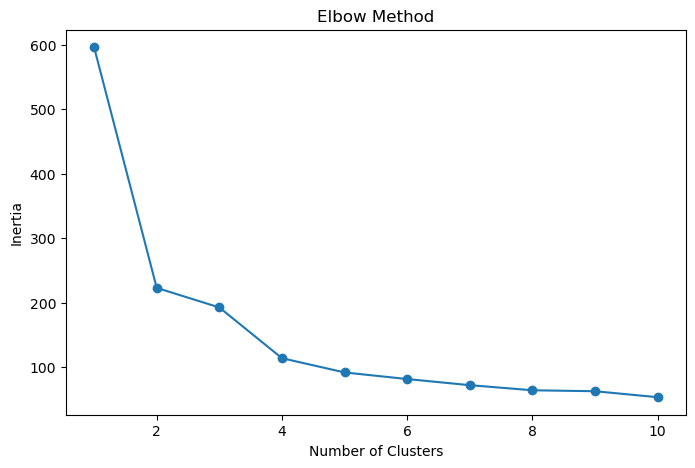

In [58]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [59]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

In [26]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm imple

In [60]:
# Apply K Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original scaled dataframe
scaled_features['KMeans_Cluster'] = kmeans_labels


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


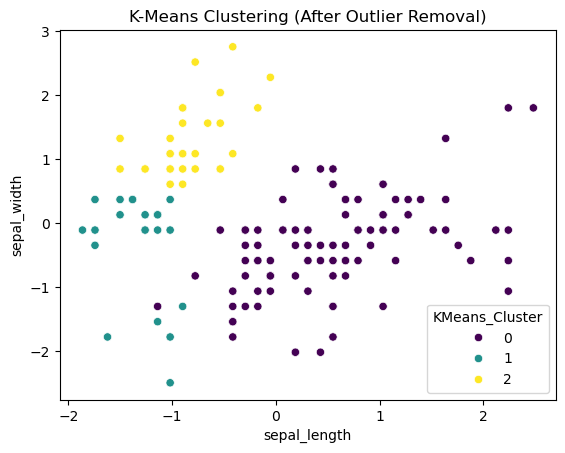

In [61]:
# visualizations

sns.scatterplot(
    x=scaled_features.iloc[:, 0],
    y=scaled_features.iloc[:, 1],
    hue=scaled_features['KMeans_Cluster'],
    palette="viridis"
)
plt.title("K-Means Clustering (After Outlier Removal)")
plt.show()


In [62]:
dendrogram?

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children. The top of the U-link indicates a
cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents
the distance between the child clusters. It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encodi

In [63]:
linkage?

Signature: linkage(y, method='single', metric='euclidean', optimal_ordering=False)
Docstring:
Perform hierarchical/agglomerative clustering.

The input y may be either a 1-D condensed distance matrix
or a 2-D array of observation vectors.

If y is a 1-D condensed distance matrix,
then y must be a :math:`\binom{n}{2}` sized
vector, where n is the number of original observations paired
in the distance matrix. The behavior of this function is very
similar to the MATLAB linkage function.

A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
:math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
cluster with an index less than :math:`n` corresponds to one of
the :math:`n` original observations. The distance between
clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
fourth value ``Z[i, 3]`` represents the number of original
observations in the newly formed cluster.

The following linkage methods are used to comp

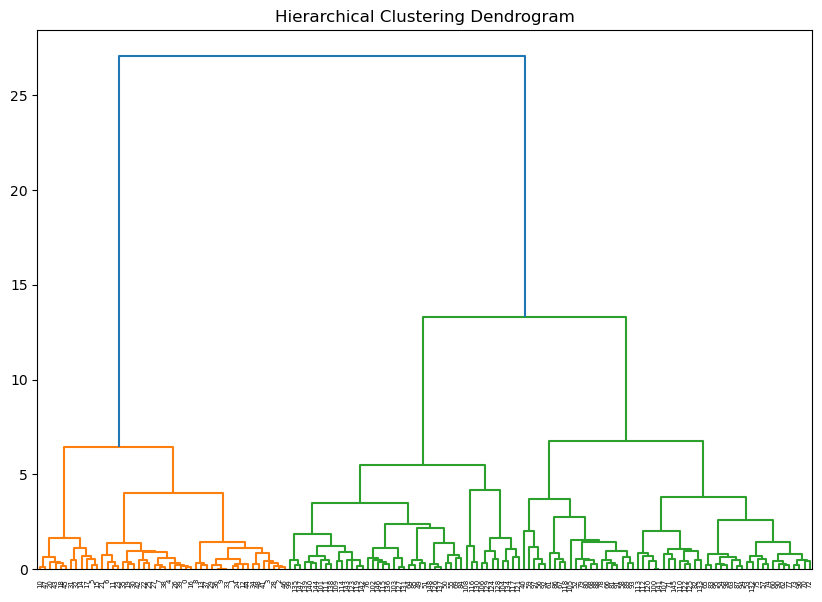

In [64]:
# perform hierarchical clustering

linked = linkage(
    scaled_features.drop(columns=['KMeans_Cluster']),'ward'
)

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [65]:
# applying  agglomerativeClustering 

AgglomerativeClustering?

Init signature:
AgglomerativeClustering(
    n_clusters=2,
    *,
    metric='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
    compute_distances=False,
)
Docstring:     
Agglomerative Clustering.

Recursively merges pair of clusters of sample data; uses linkage distance.

Read more in the :ref:`User Guide <hierarchical_clustering>`.

Parameters
----------
n_clusters : int or None, default=2
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

metric : str or callable, default="euclidean"
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed". If linkage is "ward", only
    "euclidean" is accepted. If "precomputed", a distance matrix is needed
    as input for the fit method. If connectivity is None, linkage is
    "single" and affinity is not "precomputed" any valid pairwise distance
    met

In [66]:
agg = AgglomerativeClustering(n_clusters=3)
hier_labels = agg.fit_predict(
    scaled_features.drop(columns=['KMeans_Cluster'])
)

scaled_features['Hierarchical_Cluster'] = hier_labels

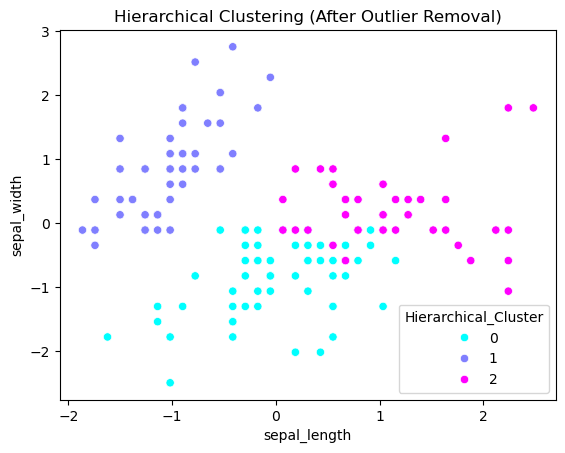

In [67]:
sns.scatterplot(
    x=scaled_features.iloc[:, 0],
    y=scaled_features.iloc[:, 1],
    hue=scaled_features['Hierarchical_Cluster'],
    palette="cool"
)
plt.title("Hierarchical Clustering (After Outlier Removal)")
plt.show()


In [68]:
# clustering Evaluation 


X_eval = scaled_features.drop(
    columns=['KMeans_Cluster', 'Hierarchical_Cluster']
)

In [69]:
# Silhouette Score
sil_kmeans = silhouette_score(X_eval, scaled_features['KMeans_Cluster'])
sil_hier = silhouette_score(X_eval, scaled_features['Hierarchical_Cluster'])

In [70]:
# Davies-Bouldin Index
db_kmeans = davies_bouldin_score(X_eval, scaled_features['KMeans_Cluster'])
db_hier = davies_bouldin_score(X_eval, scaled_features['Hierarchical_Cluster'])

# Adjusted Rand Index
ari_kmeans = adjusted_rand_score(target_clean, scaled_features['KMeans_Cluster'])
ari_hier = adjusted_rand_score(target_clean, scaled_features['Hierarchical_Cluster'])

In [71]:
print("\nClustering Evaluation Metrics (After Outlier Handling)")
print(f"Silhouette (KMeans): {sil_kmeans}")
print(f"Silhouette (Hierarchical): {sil_hier}")
print(f"Davies-Bouldin (KMeans): {db_kmeans}")
print(f"Davies-Bouldin (Hierarchical): {db_hier}")
print(f"ARI (KMeans): {ari_kmeans}")
print(f"ARI (Hierarchical): {ari_hier}")


Clustering Evaluation Metrics (After Outlier Handling)
Silhouette (KMeans): 0.4795432816588049
Silhouette (Hierarchical): 0.4591238875372741
Davies-Bouldin (KMeans): 0.7853503509786511
Davies-Bouldin (Hierarchical): 0.8366616573403403
ARI (KMeans): 0.4259943339972536
ARI (Hierarchical): 0.6158314438549761
